In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os, math
import matplotlib.pyplot as plt
np.random.seed(12345)
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100
%matplotlib inline
import random

In [2]:
FEATURE_COUNT = 100
SAMPLE_SIZE = 30

In [3]:
time_sequence = np.linspace(0, 30, FEATURE_COUNT)
def gen_curve(a, w, f):
#   y=Asin(wx+φ)
    return np.sin(time_sequence*w+f)*a

$$ y = A\sin{( \omega x+φ)} $$

# 创建两组振幅、相位、频率不同的正弦曲线，再随机混入高斯噪声

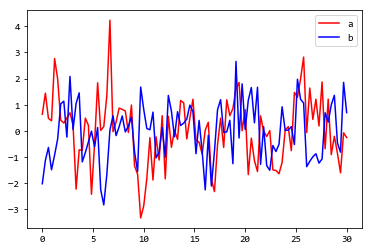

In [4]:
standart_a = gen_curve(1,1,1)
standart_b = gen_curve(0.6,1.2,4)
sample_a = standart_a + np.random.normal(size=FEATURE_COUNT)
sample_b = standart_b + np.random.normal(size=FEATURE_COUNT)
plt.plot(time_sequence, sample_a, "r", label=u"a")
plt.plot(time_sequence, sample_b, "b", label=u"b")
plt.legend()
plt.show()

# 生成30个随机样本

In [5]:
for i in range(SAMPLE_SIZE-1):
    sample_a = np.vstack((sample_a, standart_a + np.random.normal(size=FEATURE_COUNT)))
for i in range(SAMPLE_SIZE-1):
    sample_b = np.vstack((sample_b, standart_b + np.random.normal(size=FEATURE_COUNT)))

In [6]:
label = np.append(np.array(["a" for x in range(SAMPLE_SIZE)]),np.array(["b" for x in range(SAMPLE_SIZE)]))
sample = np.vstack((sample_a, sample_b))
label.shape, sample.shape

((60,), (60, 100))

# 使用支持向量机方法拟合数据

In [7]:
from sklearn.svm import SVC
cls = SVC()
cls.fit(sample,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# 生成A的一个随机样本，并用模型验证

In [8]:
cls.predict(standart_a + np.random.normal(size=FEATURE_COUNT))

array(['a'], 
      dtype='|S1')

# 使用sklearn.model_selectio模块寻找参数gamma的最佳取值

In [9]:
# from sklearn.svm import SVC
# from sklearn.model_selection import validation_curve
# param_range = np.logspace(-6, -1, 5)
# train_scores, test_scores = validation_curve(
#     SVC(), sample, label, param_name="gamma", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
# plt.xlabel("$\gamma$")
# plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
# lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training score",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
# plt.legend(loc="best")
# plt.show()